<a href="https://colab.research.google.com/github/aryanycce/ML-practicals/blob/main/Practical6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-4c7cd4e20f48>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype(int)


Accuracy: 1.00
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       419
         1.0       1.00      1.00      1.00       893

    accuracy                           1.00      1312
   macro avg       1.00      1.00      1.00      1312
weighted avg       1.00      1.00      1.00      1312



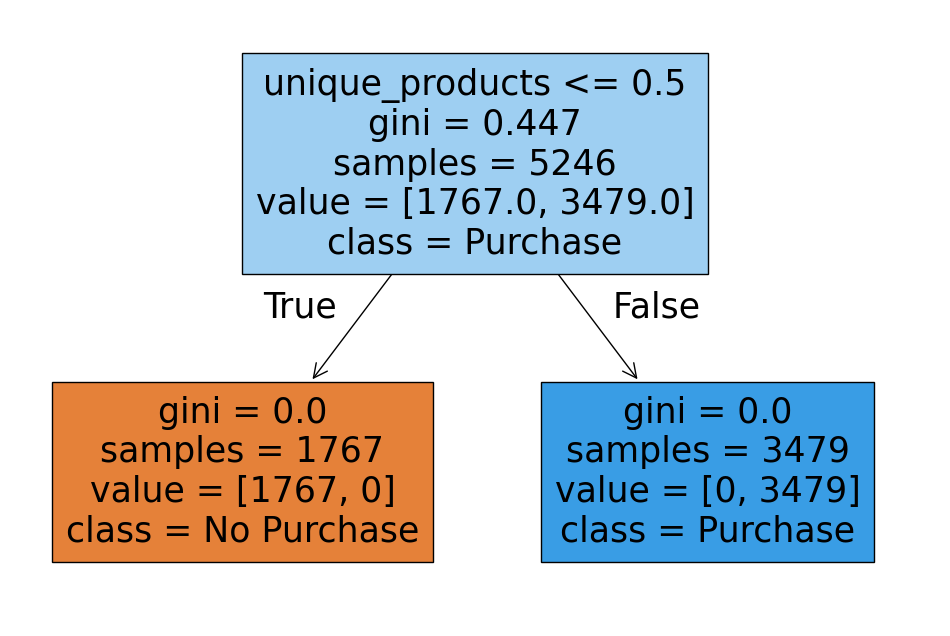

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
file_path = "data.csv"  # Ensure you upload the dataset in Colab
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df = df.dropna(subset=['CustomerID'])
df['CustomerID'] = df['CustomerID'].astype(int)

# Aggregate data per customer
customer_data = df.groupby('CustomerID').agg(
    num_visits=('InvoiceNo', 'nunique'),
    total_quantity=('Quantity', 'sum'),
    avg_unit_price=('UnitPrice', 'mean'),
    unique_products=('StockCode', 'nunique')
).reset_index()

# Introduce synthetic non-buyers (50% of dataset size)
n_non_buyers = len(customer_data) // 2
non_buyers = pd.DataFrame({
    'num_visits': np.random.randint(0, 3, n_non_buyers),
    'total_quantity': np.zeros(n_non_buyers),
    'avg_unit_price': np.zeros(n_non_buyers),
    'unique_products': np.zeros(n_non_buyers),
    'made_purchase': np.zeros(n_non_buyers)
})

customer_data['made_purchase'] = 1  # Buyers
customer_data = pd.concat([customer_data, non_buyers], ignore_index=True)

# Prepare data for modeling
X = customer_data[['num_visits', 'total_quantity', 'avg_unit_price', 'unique_products']]
y = customer_data['made_purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Visualize Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Purchase', 'Purchase'], filled=True)
plt.show()
